The strategy is based on buying at the closing price on Fridays and closing the position at the closing price on the following Monday.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

# Descargar datos de Yahoo Finance
yf.pdr_override()

# Establecer fechas de inicio y fin
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2024, 6, 17)

# Descargar datos de Yahoo Finance
gold_data = yf.download('GC=F', start=start_date, end=end_date)

# Crear una columna de día de la semana (0=Monday, ..., 4=Friday)
gold_data['DayOfWeek'] = gold_data.index.dayofweek




yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed


In [2]:
gold_data.head()

,Open,High,Low,Close,Adj Close,Volume,DayOfWeek
Date,,,,,,,
2010-01-04,1117.699951,1122.300049,1097.099976,1117.699951,1117.699951,184,0
2010-01-05,1118.099976,1126.500000,1115.000000,1118.099976,1118.099976,53,1
2010-01-06,1135.900024,1139.199951,1120.699951,1135.900024,1135.900024,363,2
2010-01-07,1133.099976,1133.099976,1129.199951,1133.099976,1133.099976,56,3
2010-01-08,1138.199951,1138.199951,1122.699951,1138.199951,1138.199951,54,4


In [3]:
# Filtrar datos de los viernes y los lunes
filtered_data = gold_data[(gold_data['DayOfWeek'] == 0) | (gold_data['DayOfWeek'] == 4)]

In [4]:
filtered_data.head()

,Open,High,Low,Close,Adj Close,Volume,DayOfWeek
Date,,,,,,,
2010-01-04,1117.699951,1122.300049,1097.099976,1117.699951,1117.699951,184,0
2010-01-08,1138.199951,1138.199951,1122.699951,1138.199951,1138.199951,54,4
2010-01-11,1150.699951,1161.199951,1143.000000,1150.699951,1150.699951,177,0
2010-01-15,1132.800049,1133.400024,1127.199951,1130.099976,1130.099976,50,4
2010-01-22,1089.199951,1095.400024,1083.000000,1089.199951,1089.199951,58,4


In [5]:
# Identificar operaciones: comprar el viernes en el precio de cierre, vender el lunes en el precio de cierre
filtered_data['Position'] = filtered_data['Close'].shift(1)
filtered_data = filtered_data.dropna()

<ipython-input-5-37e81eed4755>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Position'] = filtered_data['Close'].shift(1)


In [6]:
filtered_data.head()

,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Position
Date,,,,,,,,
2010-01-08,1138.199951,1138.199951,1122.699951,1138.199951,1138.199951,54,4,1117.699951
2010-01-11,1150.699951,1161.199951,1143.000000,1150.699951,1150.699951,177,0,1138.199951
2010-01-15,1132.800049,1133.400024,1127.199951,1130.099976,1130.099976,50,4,1150.699951
2010-01-22,1089.199951,1095.400024,1083.000000,1089.199951,1089.199951,58,4,1130.099976
2010-01-25,1095.199951,1095.199951,1095.199951,1095.199951,1095.199951,8,0,1089.199951


In [7]:
# Calcular retornos solo para los lunes (donde se cierra la posición)
filtered_data['Return'] = filtered_data.apply(
    lambda row: (row['Close'] - row['Position']) / row['Position'] if row['DayOfWeek'] == 0 else 0, axis=1
)


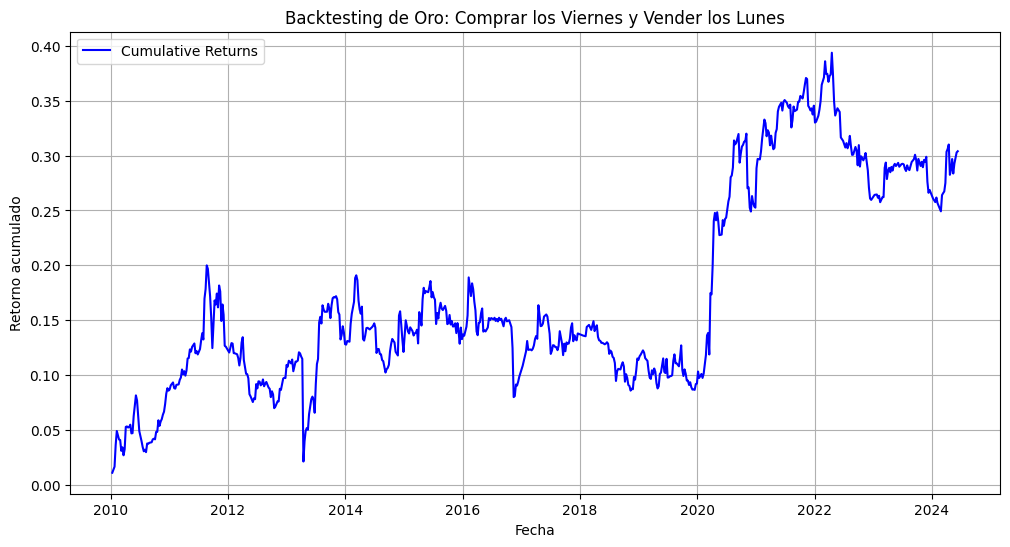

In [8]:

# Graficar retornos acumulados
filtered_data['Cumulative Return'] = filtered_data['Return'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(filtered_data[filtered_data['DayOfWeek'] == 0].index, filtered_data[filtered_data['DayOfWeek'] == 0]['Cumulative Return'], label='Cumulative Returns', color='blue')
plt.title('Backtesting de Oro: Comprar los Viernes y Vender los Lunes')
plt.xlabel('Fecha')
plt.ylabel('Retorno acumulado')
plt.legend()
plt.grid(True)
plt.show()